## Dia 2 TF-IDF

Similitud de vectores

Aplicaciones practicas de la similitud de vectores
* similitud de documentos
* spinning de articulos y CEO
* recomendaciones
* Chat Bot


https://www.mblazquez.es/blog-ccdoc-recuperacion/formulas/figura12_vectorial.png

<img ref="https://www.mblazquez.es/blog-ccdoc-recuperacion/formulas/figura12_vectorial.png" >

<img src="https://miro.medium.com/v2/resize:fit:640/format:webp/1*JclcuBpg2Ws7rnrlvxqKkQ.png" align="left">

Calcular la Similitud de Vectores

* Calculo por la distancia euclediana
* metodo del coseno, angulo entre vectores
- cos 0 = 1 maxima similitud y nada que ver -1 = 180 grados

Metodo TF-IDF
- TF: frecuencia de terminos
- IDF: inversa de frecuencia del documento(inverse document frecuency)


Manos a la obra
dataset:
https://www.kaggle.com/datasets/carolzhangdc/imdb-5000-movie-dataset


Videos Cortos:
* https://www.publisuites.com/blog/tf-idf/
* https://www.youtube.com/shorts/atAaHH8NEY4?feature=share
* https://www.tiktok.com/@mlpedia_ai/video/7320456357038034218?_r=1&_t=8oIKRYN2QmU

In [1]:
import pandas as pd

In [4]:
df_movies=pd.read_csv('datasets/movie_metadata.csv')

In [5]:
df_movies.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [6]:
df_movies['genres']=df_movies['genres'].str.replace('|',' ')
df_movies

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action Adventure Fantasy Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action Adventure Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action Adventure Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime Drama Mystery Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama Horror Thriller,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy Drama Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


In [7]:
df_movies['plot_keywords']=df_movies['plot_keywords'].str.replace('|',' ')
df_movies

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action Adventure Fantasy Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action Adventure Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action Adventure Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime Drama Mystery Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama Horror Thriller,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy Drama Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


In [8]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [9]:
# unir dos columnas


df_movies['texto']=df_movies['genres']+' '+df_movies['plot_keywords']
df_movies['texto']  # concatenar dos columnas

0       Action Adventure Fantasy Sci-Fi avatar future ...
1       Action Adventure Fantasy goddess marriage cere...
2       Action Adventure Thriller bomb espionage seque...
3       Action Thriller deception imprisonment lawless...
4                                                     NaN
                              ...                        
5038    Comedy Drama fraud postal worker prison theft ...
5039    Crime Drama Mystery Thriller cult fbi hideout ...
5040                                                  NaN
5041                                                  NaN
5042    Documentary actress name in title crush date f...
Name: texto, Length: 5043, dtype: object

In [10]:
print(df_movies['texto'].iloc[0])

Action Adventure Fantasy Sci-Fi avatar future marine native paraplegic


In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity,euclidean_distances

In [17]:
tfidf=TfidfVectorizer(max_features=2000)

In [19]:
#X=tfidf.fit_transform(df_movies['texto'])
X=tfidf.fit_transform(df_movies['texto'].fillna(''))

In [20]:
X

<5043x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 43534 stored elements in Compressed Sparse Row format>

In [21]:
peliculas = pd.Series(df_movies.index,index=df_movies['movie_title'])

In [22]:
peliculas

movie_title
Avatar                                                        0
Pirates of the Caribbean: At World's End                      1
Spectre                                                       2
The Dark Knight Rises                                         3
Star Wars: Episode VII - The Force Awakens                    4
                                                           ... 
Signed Sealed Delivered                                    5038
The Following                                              5039
A Plague So Pleasant                                       5040
Shanghai Calling                                           5041
My Date with Drew                                          5042
Length: 5043, dtype: int64

In [27]:
# otro ejemplo de conocer el indice de following
#indice=peliculas['The Following\xa0']
#indice

In [28]:
peliculas.index=peliculas.index.str.strip()

In [91]:
indice=peliculas['The Avengers']
indice=17

In [92]:
consulta=X[indice]
consulta

<1x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 11 stored elements in Compressed Sparse Row format>

In [93]:
print(consulta)

  (0, 39)	0.14967051028940595
  (0, 49)	0.16296679819637241
  (0, 1532)	0.18710369180927883
  (0, 636)	0.18710369180927883
  (0, 69)	0.2979510164509945
  (0, 1062)	0.3004851595022128
  (0, 170)	0.3229742936453241
  (0, 910)	0.39296922537667767
  (0, 125)	0.3512577042445392
  (0, 924)	0.456144376281336
  (0, 1624)	0.3343231453544338


In [94]:
consulta.toarray()

array([[0., 0., 0., ..., 0., 0., 0.]])

In [95]:
# calculamos la similitud coseno

similitudes=cosine_similarity(X,consulta)   # calcula la similitud coseno

In [96]:
similitudes

array([[0.14755085],
       [0.04785939],
       [0.05654391],
       ...,
       [0.        ],
       [0.        ],
       [0.        ]])

In [97]:
similitudes=similitudes.flatten()  # convierte a un array de una sola dimension
similitudes

array([0.14755085, 0.04785939, 0.05654391, ..., 0.        , 0.        ,
       0.        ])

In [98]:
import matplotlib.pyplot as plt

(array([3.933e+03, 3.800e+02, 2.820e+02, 1.990e+02, 1.060e+02, 6.700e+01,
        3.100e+01, 2.300e+01, 6.000e+00, 3.000e+00, 6.000e+00, 0.000e+00,
        3.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00]),
 array([0.        , 0.03333333, 0.06666667, 0.1       , 0.13333333,
        0.16666667, 0.2       , 0.23333333, 0.26666667, 0.3       ,
        0.33333333, 0.36666667, 0.4       , 0.43333333, 0.46666667,
        0.5       , 0.53333333, 0.56666667, 0.6       , 0.63333333,
        0.66666667, 0.7       , 0.73333333, 0.76666667, 0.8       ,
        0.83333333, 0.86666667, 0.9       , 0.93333333, 0.96666667,
        1.        ]),
 <BarContainer object of 30 artists>)

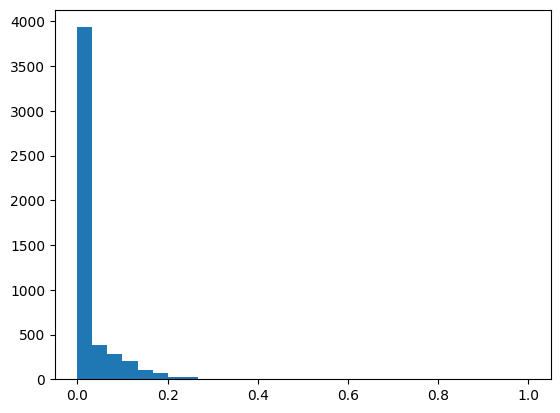

In [99]:
plt.hist(similitudes,bins=30)

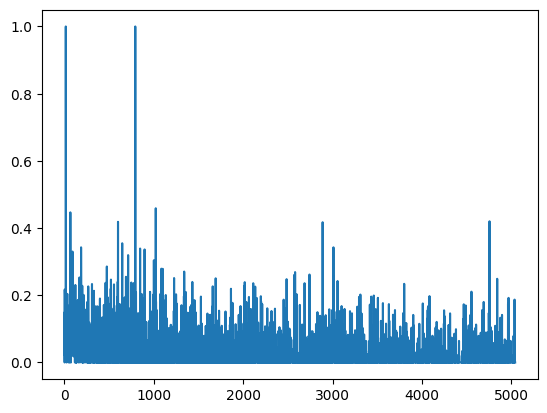

In [100]:
plt.plot(similitudes)

In [101]:
# ordenar las similitudes 
similitudes.argsort()
(-similitudes).argsort()

array([  17,  794, 1023, ..., 2469, 2454, 5042])

In [102]:
# crear la lista de recomendaciones 10 peliculas
similitudes.argsort()[-10:]
recomendaciones=similitudes.argsort()[1:11] # recomendaciones


In [103]:
recomendaciones

array([3197, 3198, 3199, 3201, 3202, 3203, 3204, 3205, 3206, 3207])

In [104]:
df_movies['movie_title'].iloc[recomendaciones]

3197    Bucky Larson: Born to Be a Star 
3198                         Bamboozled 
3199                         The Forest 
3201                  While We're Young 
3202                      A Better Life 
3203                             Spider 
3204                            Gun Shy 
3205                  Nicholas Nickleby 
3206                         The Iceman 
3207                Dekalog             
Name: movie_title, dtype: object